In [53]:
from pandas import  *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [54]:
df=read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Let us check the most important/influential features of the dataset:

In [56]:
df['salary']=le.fit_transform(df['salary'])
df['dept']=le.fit_transform(df['dept'])

In [57]:


x = df.drop('left', axis=1)

# Check the contents of X to ensure the 'left' column is excluded
df.head()  # This will display the first few rows of your X (features) DataFrame


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [58]:
y=df['left']

In [59]:
from  sklearn.linear_model import Lasso
ls=Lasso(alpha=0.5)
ls.fit(x,y)

Lasso(alpha=0.5)

In [60]:
names=x.columns
names

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [61]:
rng=range(len(names))

In [62]:
ls.coef_

array([-0.        , -0.        ,  0.        ,  0.00040748,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ])

Text(0, 0.5, 'Lasso coefficients')

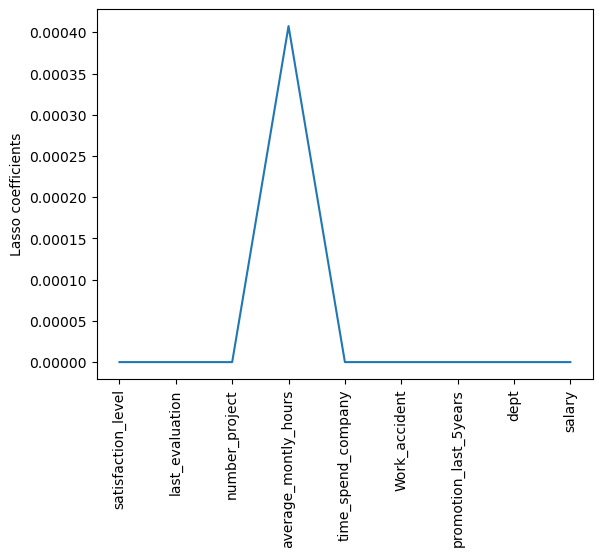

In [63]:
plot(rng,ls.coef_)
xticks(rng,names,rotation=90)
ylabel('Lasso coefficients')

 FOR X  WE TAKE ONLY THESE COLUMNS - satisfaction_level ,average_montly_hours , promotion_last_5years , salary.

In [64]:
x=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
y=df[['left']]


In [65]:
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1
...,...,...,...,...
14994,0.40,151,0,1
14995,0.37,160,0,1
14996,0.37,143,0,1
14997,0.11,280,0,1


LOW- 1 , MEDIUM-2

In [66]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(x,y)

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [67]:
l.score(x,y)

0.7727848523234883

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=150)

In [69]:
r=LogisticRegression()
r.fit(x_train,y_train)

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [70]:
r.score(x_train,y_train)

0.7728977414784566

In [71]:
r.score(x_test,y_test)

0.7776666666666666

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [73]:
from sklearn.svm import SVC
s=SVC()
s.fit(x_train,y_train)

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [74]:
s.score(x_train,y_train)

0.7774814567880657

In [75]:
s.score(x_test,y_test)

0.78

In [76]:
s.predict([[0.11,286,0,2]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [77]:
r.predict([[0.11,286,0,2]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [78]:
r.predict([[0.48,228,0,1]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [138]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=90,random_state=17)
r.fit(x_train,y_train)

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=90, random_state=17)

In [139]:
r.score(x_train,y_train)

0.9818318193182766

In [140]:
r.score(x_test,y_test)

0.941

In [144]:
x=r.predict([[0.11,286,0,2]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [145]:
x

array([1], dtype=int64)

In [87]:
## RF model
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

r = RandomForestClassifier()
max_accuracy = 0  # Initialize maximum accuracy

best_random_state = 0
best_n_estimators = 0


for i in range(1, 10):  # Vary random state
    for n_estimators in range(1, 10):  # Vary number of estimators
        r.set_params(random_state=i, n_estimators=n_estimators)  # Set random state and n_estimators
        r.fit(x_train, y_train)  # Fit the model
        accuracy = r.score(x_train, y_train)  # Evaluate accuracy on test data

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_random_state = i
            best_n_estimators = n_estimators

print(f"Maximum Accuracy: {max_accuracy} achieved with random state: {best_random_state} and n_estimators: {best_n_estimators}")
'''

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import train_test_split\n\nr = RandomForestClassifier()\nmax_accuracy = 0  # Initialize maximum accuracy\n\nbest_random_state = 0\nbest_n_estimators = 0\n\n\nfor i in range(1, 10):  # Vary random state\n    for n_estimators in range(1, 10):  # Vary number of estimators\n        r.set_params(random_state=i, n_estimators=n_estimators)  # Set random state and n_estimators\n        r.fit(x_train, y_train)  # Fit the model\n        accuracy = r.score(x_train, y_train)  # Evaluate accuracy on test data\n\n        if accuracy > max_accuracy:\n            max_accuracy = accuracy\n            best_random_state = i\n            best_n_estimators = n_estimators\n\nprint(f"Maximum Accuracy: {max_accuracy} achieved with random state: {best_random_state} and n_estimators: {best_n_estimators}")\n'

In [143]:
#RF model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

max_train_accuracy = 0  # Initialize maximum training accuracy
max_test_accuracy = 0  # Initialize maximum test accuracy
best_random_state_train = 0
best_random_state_test = 0

for i in range(1, 20):  # Vary random state
    # Vary number of estimators
    d = RandomForestClassifier(n_estimators=90,random_state=i)
    d.fit(x_train, y_train)
    
    train_accuracy = d.score(x_train, y_train)  # Evaluate accuracy on training data
    test_accuracy = d.score(x_test, y_test)  # Evaluate accuracy on test data
    
    # Check and update best training accuracy and random state
    if train_accuracy > max_train_accuracy:
        max_train_accuracy = train_accuracy
        best_random_state_train = i
    
    # Check and update best test accuracy and random state
    if test_accuracy > max_test_accuracy:
        max_test_accuracy = test_accuracy
        best_random_state_test = i

print(f"Best Training Accuracy: {max_train_accuracy} achieved with random state: {best_random_state_train}")
print(f"Best Test Accuracy: {max_test_accuracy} achieved with random state: {best_random_state_test}")


c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

Best Training Accuracy: 0.981915159596633 achieved with random state: 1
Best Test Accuracy: 0.941 achieved with random state: 17


In [ ]:
## RF model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

r = RandomForestRegressor()
max_accuracy = 0  # Initialize maximum accuracy
max_accuracy2=0
best_random_state = 0
best_n_estimators = 0


for i in range(97,100):  # Vary random state
      # Vary number of estimators
        r.set_params(n_estimators=i)  # Set random state and n_estimators
        r.fit(x_train, y_train)  # Fit the model
        accuracy = r.score(x_train, y_train)  # Evaluate accuracy on train data
        accuracy2=r.score(x_test, y_test) # Evaluate accuracy on test data
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_n_estimators=i
        if accuracy2 > max_accuracy:
            max_accuracy2 = accuracy2
            best_n_estimators=i
print(f"Maximum Accuracy: {max_accuracy} and max(test) accuracy : {max_accuracy2} achieved with n_estimators: {best_n_estimators}")


c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Maximum Accuracy: 0.9168560685716396 and max(test) accuracy : 0 achieved with n_estimators: 98


In [ ]:
###
'''import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming 'x' and 'y' are defined with your dataset

max_train_accuracy = 0.0  # Initialize maximum training accuracy
best_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy
max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    r=RandomForestRegressor(random_state=i)
    r.fit(x_train,y_train)  # Train the model
    train_score = r.score(x_train, y_train)  # Calculate accuracy on the training set
    test_score = r.score(x_test, y_test)  # Calculate accuracy on the test set
    
    # Check for the maximum training accuracy
    if train_score > max_train_accuracy:
        max_train_accuracy = train_score
        best_train_random_state = i

    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i

print(f"The maximum training accuracy within the range of random states is: {max_train_accuracy} achieved with random state: {best_train_random_state}")
print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")
'''

The maximum training accuracy within the range of random states is: 0.0 achieved with random state: 0
The maximum testing accuracy within the range of random states is: 0.0 achieved with random state: 0
